# Python Coding Test: Unsupervised Learning

## Section A: Dataset Loading & Exploration

In [89]:
# LIBRARIES
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

Load the dataset using pandas and print the first 5 rows.

In [4]:
df = pd.read_csv(r'C:\Users\user\Machine Learning\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Print the shape and column names of the dataset.

In [13]:
print('The shape of the dataset',df.shape)
column_names = df.columns
print(column_names)

The shape of the dataset (200, 5)
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


Check for missing values and describe how many nulls are in each column.

In [19]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Create a histogram of the Age column.

<Axes: xlabel='Age', ylabel='Count'>

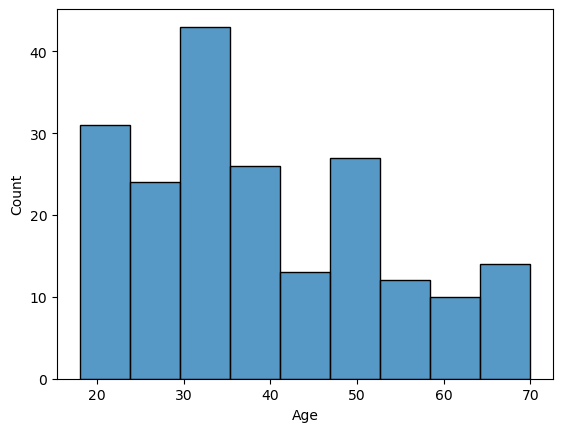

In [29]:
sns.histplot(data=df, x='Age')


Use seaborn to create a boxplot comparing Spending Score (1-100) by Gender.

C:\Users\user\AppData\Local\Temp\ipykernel_11608\1272404495.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', palette='pastel')


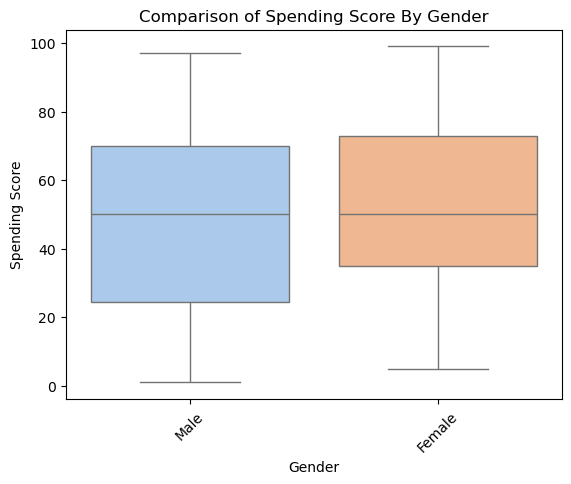

In [33]:
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', palette='pastel')
plt.title('Comparison of Spending Score By Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.xticks(rotation=45)
plt.show()

Normalize the columns Annual Income (k$) and Spending Score (1-100) using MinMaxScaler.

In [ ]:
# columns to be normalized
cols_to_normalize = ['Annual Income (k$)', 'Spending Score (1-100)']

# initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# Display the normalized DataFrame 
df.head()

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959


#  Section B: KMeans Clustering

Select the columns ['Annual Income (k$)', 'Spending Score (1-100)'] for clustering and assign to variable X.

In [40]:
# Select the desired columns and assign to X
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

#  view the first few rows of X to verify:
# print(X.head())

Use the elbow method to determine the optimal number of clusters for KMeans. Plot the within-cluster sum of squares for k = 1 to 10.

In [48]:
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    


c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

Text(0, 0.5, 'Inertia')

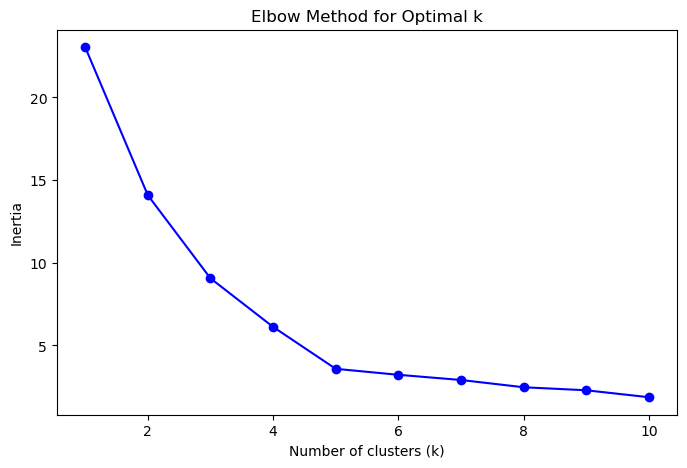

In [53]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')


Based on your plot, choose an appropriate value for k. Initialize and fit a KMeans model.

In [54]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Add the predicted cluster labels as a new column in the DataFrame.

In [55]:
# df['Cluster'] = kmeans.fit_predict(X)
# Already done in the previous step

Plot the KMeans clusters in 2D using plt.scatter(), coloring by cluster.

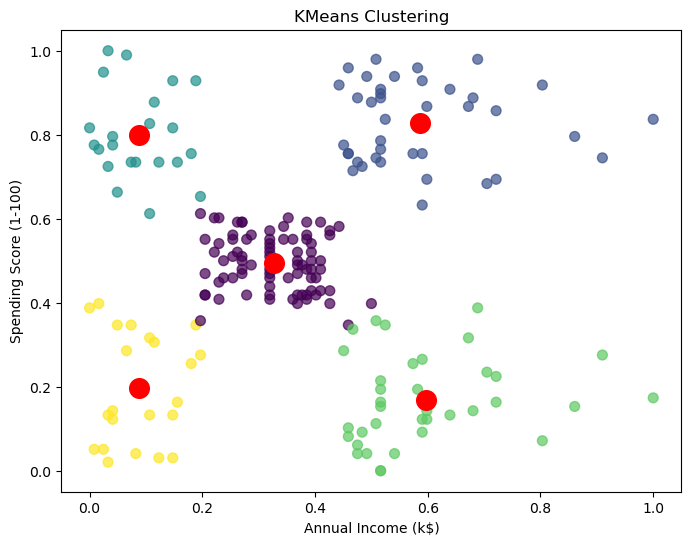

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.7
)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', label='Centroids')

plt.title('KMeans Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Print the coordinates of the cluster centroids.

In [58]:
print("Cluster Centroids:")
print(kmeans.cluster_centers_)

Cluster Centroids:
[[0.32695811 0.49533888]
 [0.58638083 0.82783883]
 [0.08792846 0.79962894]
 [0.59631148 0.16921769]
 [0.08792846 0.19619666]]


Calculate and print the number of data points in each cluster.

In [61]:
cluster_counts = df['Cluster'].value_counts().sort_index()

print(cluster_counts )

Cluster
0    81
1    39
2    22
3    36
4    22
Name: count, dtype: int64


Which cluster has the highest average income? Write code to find out.

In [63]:
# Group by cluster and calculate average income
avg_income_per_cluster = df.groupby('Cluster')['Annual Income (k$)'].mean()

# Find the cluster with the highest average income
highest_income_cluster = avg_income_per_cluster.idxmax() # returns the cluster label with the highest mean.
highest_income_value = avg_income_per_cluster.max() # gets the value itself

print(f"Cluster {highest_income_cluster} has the highest average income: {highest_income_value:.2f} k$")


Cluster 3 has the highest average income: 0.60 k$


Plot a seaborn.pairplot showing Age, Annual Income (k$), and Spending Score (1-100) colored by cluster.

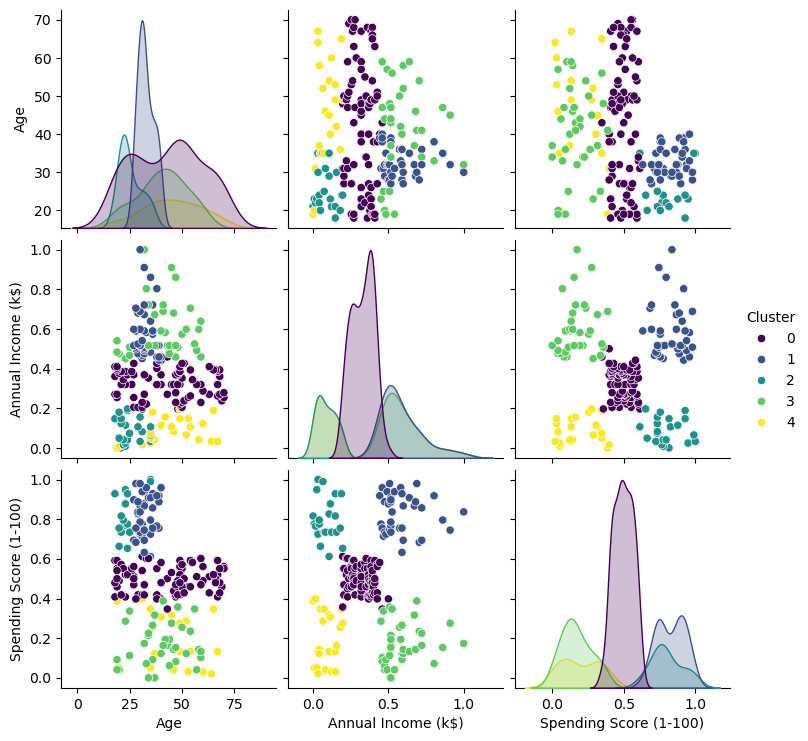

In [64]:
# Relevant columns for the pairplot
pairplot_data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']]

# Create the pairplot
sns.pairplot(pairplot_data, hue='Cluster', palette='viridis', diag_kind='kde')

Modify the KMeans model to include Age as well (i.e., use 3 features). Plot the new clusters.

In [65]:
# Select three features for clustering: Age, Income, and Spending Score
X_3d = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Initialize and fit KMeans
kmeans_3d = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster_3D'] = kmeans_3d.fit_predict(X_3d)


c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


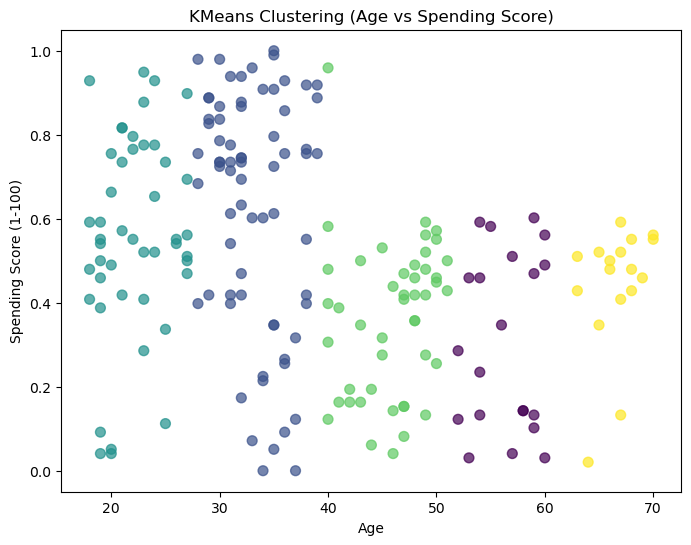

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(
    df['Age'],
    df['Spending Score (1-100)'],
    c=df['Cluster_3D'],        # Color by the cluster from the 3-feature KMeans
    cmap='viridis',
    s=50,
    alpha=0.7
)

plt.title('KMeans Clustering (Age vs Spending Score)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

What happens when you set k to a very large number (e.g., 15)? Fit the model and describe in comments.

In [68]:
# Set k to a large value (e.g., 15)
kmeans_large_k = KMeans(n_clusters=15, init='k-means++', random_state=42)
df['Cluster_k15'] = kmeans_large_k.fit_predict(X_3d)

# - The model forces data into many small clusters.
# - Can lead to overfitting: clusters may capture noise instead of structure.
# - Some clusters may have very few data points or be tightly packed.



c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Use StandardScaler instead of MinMaxScaler and re-run the clustering. Compare the results.

In [73]:
# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_3d)

# Refit KMeans on scaled data
kmeans_std = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster_std'] = kmeans_std.fit_predict(X_scaled)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [74]:
# Comparison original and scaled clustering
print("Original clusters (without scaling):")
print(df['Cluster_3D'].value_counts().sort_index())

print("\nClusters with StandardScaler applied:")
print(df['Cluster_std'].value_counts().sort_index())

Original clusters (without scaling):
Cluster_3D
0    21
1    70
2    46
3    46
4    17
Name: count, dtype: int64

Clusters with StandardScaler applied:
Cluster_std
0    58
1    40
2    26
3    45
4    31
Name: count, dtype: int64


#  Section C: Hierarchical Clustering

Use scipy.cluster.hierarchy to generate a linkage matrix using 'ward' linkage.

In [91]:
# Use only numerical features for hierarchical clustering
num_df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [84]:
linked = linkage(num_df, method='ward')

Plot a dendrogram of the data using the linkage matrix.

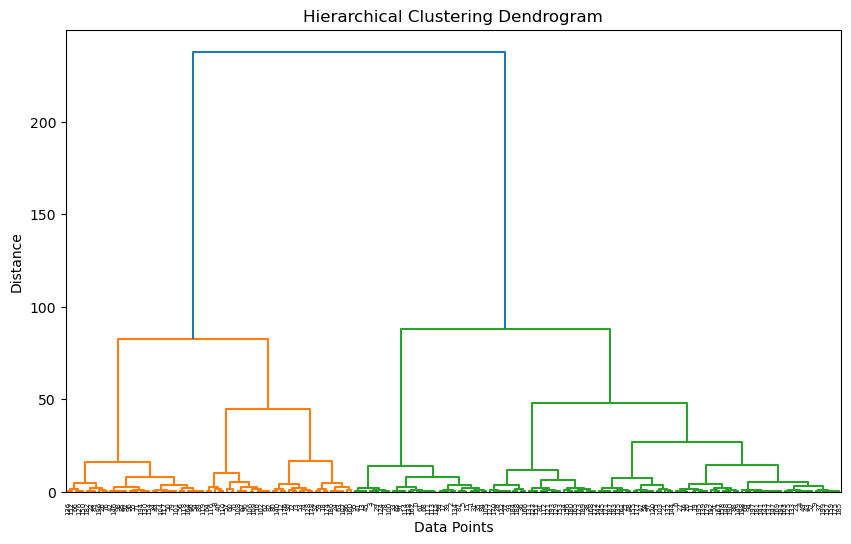

In [ ]:
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

From the dendrogram, determine how many clusters would make sense (cutting at a good height).

In [88]:
# Cutting the dendrogram at distance ≈ 100 suggests that 5 clusters is a sensible choice.

Use AgglomerativeClustering from sklearn with the chosen number of clusters and print the labels.

Add the labels as a column to the dataset and compare the results with KMeans labels using pd.crosstab().


In [ ]:
model = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Cluster'] = model.fit_predict(num_df)


In [100]:
print("Agglomerative Clustering Labels:" )
print(df['Cluster'].values)


Agglomerative Clustering Labels:
[2 2 2 2 1 2 1 2 0 1 0 1 0 2 4 2 1 2 0 1 1 1 3 1 0 1 3 1 4 2 0 2 0 2 3 2 4
 1 4 2 0 2 3 1 3 2 3 1 1 1 3 1 1 0 3 3 3 0 1 0 0 2 0 0 0 2 3 0 2 1 0 3 0 0
 0 1 3 4 2 3 0 4 0 3 2 3 0 2 1 3 0 2 3 4 1 2 3 1 3 2 2 3 0 1 3 2 0 0 0 0 0
 2 4 2 2 2 0 3 3 3 1 4 4 4 2 1 3 4 0 4 3 4 1 1 2 1 3 1 2 1 0 1 1 1 1 1 3 1
 1 1 3 4 3 4 3 1 4 1 1 1 0 1 2 1 3 4 4 1 4 1 4 1 4 4 0 1 0 1 0 1 4 1 3 1 4
 1 0 1 4 4 1 1 1 4 3 1 3 1 1 1]


compare the results with KMeans labels using pd.crosstab().

In [101]:
# fit KMeans 
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(num_df)

# Step 2: Compare KMeans and Agglomerative Clustering using pd.crosstab()
comparison = pd.crosstab(df['KMeans_Cluster'], df['Cluster'])

# Step 3: Print the result
print("Comparison of KMeans vs Agglomerative Clustering:")
print(comparison)

Comparison of KMeans vs Agglomerative Clustering:
Cluster          0   1   2   3   4
KMeans_Cluster                    
0               21   0   0   0   0
1                0  52   0   0  18
2                0  11  35   0   0
3                0   0   0  36  10
4               17   0   0   0   0


c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Create a 2D scatter plot of the hierarchical clusters using the same two features.

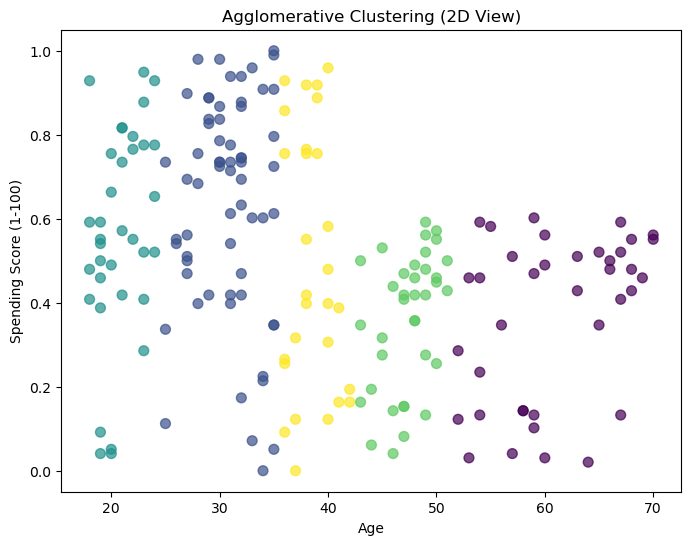

In [103]:
plt.figure(figsize=(8, 6))
plt.scatter(
    df['Age'],
    df['Spending Score (1-100)'],
    c=df['Cluster'],              # Hierarchical cluster labels
    cmap='viridis',
    s=50,
    alpha=0.7
)

plt.title('Agglomerative Clustering (2D View)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

#  Section D: Interpretation + Strategy

Write a function that takes a cluster label and prints summary statistics for that group (mean income, age, spending score).

In [104]:
def print_cluster_summary(label):
    group = df[df['Cluster'] == label]
    print(f"Summary for Cluster {label}:")
    print(f" - Mean Age: {group['Age'].mean():.2f}")
    print(f" - Mean Income: {group['Annual Income (k$)'].mean():.2f}")
    print(f" - Mean Spending Score: {group['Spending Score (1-100)'].mean():.2f}")
    print()


In [105]:
for i in sorted(df['Cluster'].unique()):
    print_cluster_summary(i)


Summary for Cluster 0:
 - Mean Age: 60.95
 - Mean Income: 0.32
 - Mean Spending Score: 0.37

Summary for Cluster 1:
 - Mean Age: 30.79
 - Mean Income: 0.43
 - Mean Spending Score: 0.64

Summary for Cluster 2:
 - Mean Age: 20.83
 - Mean Income: 0.24
 - Mean Spending Score: 0.56

Summary for Cluster 3:
 - Mean Age: 47.42
 - Mean Income: 0.38
 - Mean Spending Score: 0.36

Summary for Cluster 4:
 - Mean Age: 38.50
 - Mean Income: 0.47
 - Mean Spending Score: 0.49



Cluster 4 has the highest average income (0.47), but a moderate spending score (0.49), and Cluster 3 has lower spending (0.36) but also lower income.

Identify the cluster that represents high income but low spending customers.

In [107]:
print_cluster_summary(4)

Summary for Cluster 4:
 - Mean Age: 38.50
 - Mean Income: 0.47
 - Mean Spending Score: 0.49



In [108]:
# Offer premium deals, curated high-end ones, or invite-only events
# to encourage greater spending from this group.
# Tailored product suggestions and priority access to new arrivals can boost engagement.


Identify the cluster that represents low income but high spending customers.

In [109]:
# Cluster 1 shows above-average spending (0.64) with only moderate income (0.43).
#  But in a normalized space, that's the best match.

print_cluster_summary(1)

Summary for Cluster 1:
 - Mean Age: 30.79
 - Mean Income: 0.43
 - Mean Spending Score: 0.64



In [110]:
# This group shows strong spending behavior despite limited income.
# Retain them through rewards programs, referral incentives, or affordable deals.
# Satisfied customers in this segment can drive long-term loyalty and organic promotion.


Export the clustered dataset to a new CSV file using df.to_csv().

In [111]:
df.to_csv("clustered_customers.csv", index=False)
print("Clustered data exported to 'clustered_customers.csv'")

Clustered data exported to 'clustered_customers.csv'
